# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('codsoft_task4/advertising.csv')

In [3]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Data Preprocessing

In [4]:
df.shape

(200, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.duplicated().sum()

0

In [7]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Data Visualization

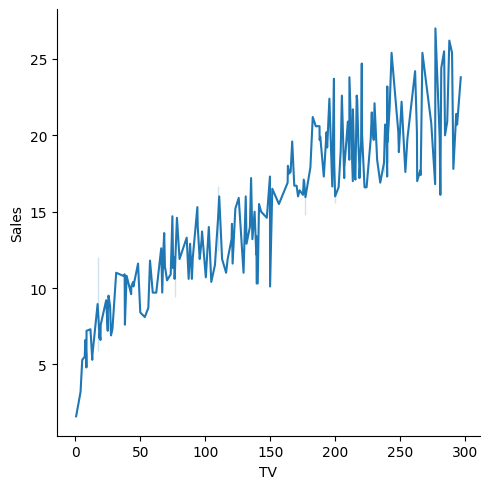

In [ ]:
sns.relplot(data = df, x = 'TV', y = 'Sales', kind = 'line')

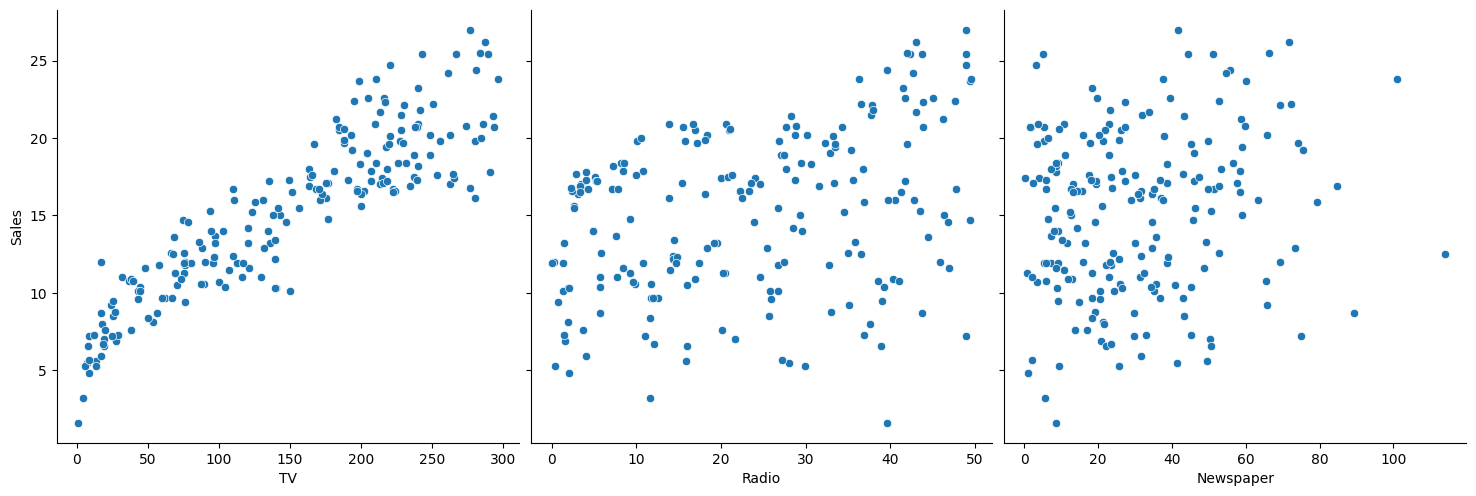

In [11]:
sns.pairplot(df, x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', kind = 'scatter', height = 5)

<Axes: ylabel='TV'>

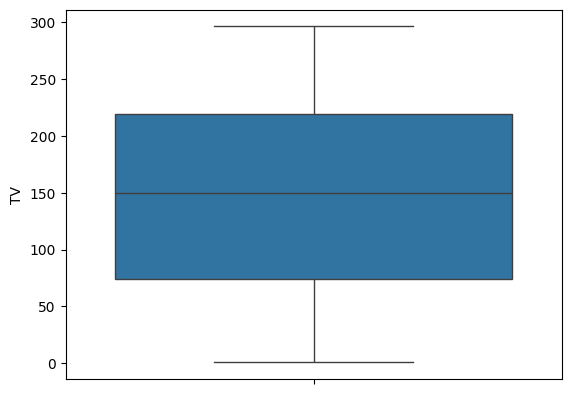

In [14]:
sns.boxplot(data = df, y = 'TV')

<Axes: ylabel='Sales'>

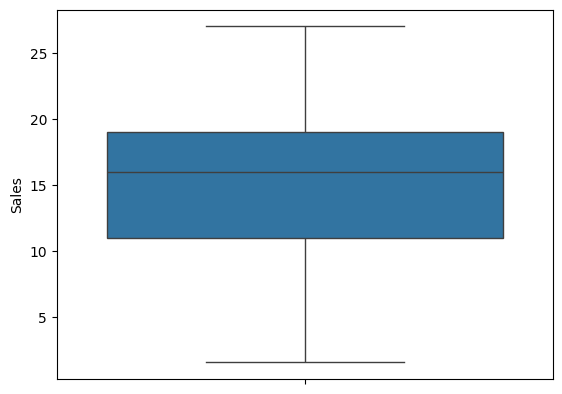

In [15]:
sns.boxplot(data = df, y = 'Sales')

<Axes: >

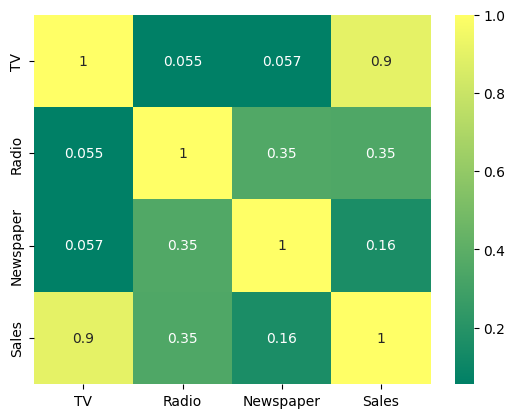

In [39]:
sns.heatmap(df.corr(), cmap="summer", annot = True)

In [17]:
x = df[['TV']]
y = df['Sales']

# train and test split

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((150, 1), (50, 1), (150,), (50,))

# Model Building

In [21]:
model = LinearRegression()

In [22]:
model.fit(x_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(x_test)

# Model Evaluation

In [24]:
print("MSE : ",mean_squared_error(y_test,y_pred))

MSE :  5.513351187165511


In [25]:
import math
print("RMSE : ", math.sqrt(mean_squared_error(y_test,y_pred)))

RMSE :  2.3480526372220685


In [26]:
y_test_arr = y_test.to_numpy()

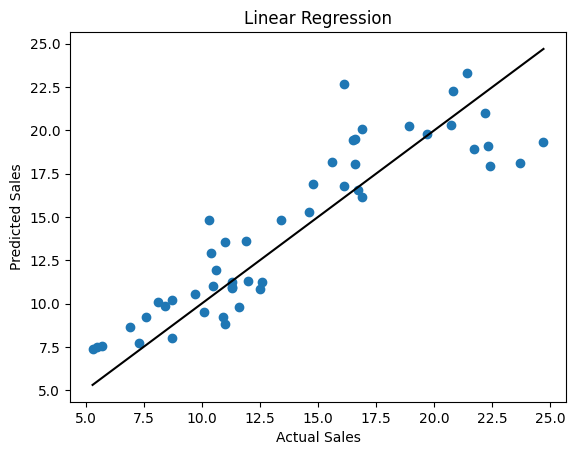

In [27]:
# plottting the actual and predicted values
plt.scatter(y_test_arr, y_pred)

# adding labels and title
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Linear Regression')

# adding a diagonal line to show where predictions would be perfect
lims = [min(min(y_test_arr), min(y_pred)), max(max(y_test_arr), max(y_pred))]
plt.plot(lims, lims, color = 'black')

plt.show()

In [33]:
# function to predict sales given the value of TV

def manual_testing(value):
  temp = { 'TV' : [value]}
  tv = pd.DataFrame(temp)
  result = model.predict(tv)
  print('The value of sales for ',value, ' is : ',round(result[0],2))

In [37]:
value = float(input("Enter value of TV : "))
manual_testing(value)

Enter value of TV : 150.5
The value of sales for  150.5  is :  15.43
